# Assignment #4 - Neural Networks

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

<font color="blue"> Sagar Nandu </font>

In [40]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
import itertools

%matplotlib inline

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

#### Objective:
Objectives of this is assignment are:
- Get understanding of how Neural Networks work
- What is basic math involved in NN
- Learn how to code a Neural Net from scratch
- Understand how forward pass and backward pass work
- What is difference between linear and non linear models? How their objective functions change and what happens when you use them seperately? What are drawbacks to it?



# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

#### Data Dictionary

There are 25 variables:

1. <b>ID:</b> ID of each client  
2. <b>LIMIT_BAL:</b> Amount of given credit in NT dollars (includes individual and family/supplementary credit  
3. <b>SEX:</b> Gender (1=male, 2=female)  
4. <b>EDUCATION:</b> (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
5. <b>MARRIAGE:</b> Marital status (1=married, 2=single, 3=others)  
6. <b>AGE:</b> Age in years  
7. <b>PAY_0:</b> Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. <b>PAY_2:</b> Repayment status in August, 2005 (scale same as above)  
9. <b>PAY_3:</b> Repayment status in July, 2005 (scale same as above)  
10. <b>PAY_4:</b> Repayment status in June, 2005 (scale same as above)  
11. <b>PAY_5:</b> Repayment status in May, 2005 (scale same as above)  
12. <b>PAY_6:</b> Repayment status in April, 2005 (scale same as above)  
13. <b>BILL_AMT1:</b> Amount of bill statement in September, 2005 (NT dollar)  
14. <b>BILL_AMT2:</b> Amount of bill statement in August, 2005 (NT dollar)  
15. <b>BILL_AMT3:</b> Amount of bill statement in July, 2005 (NT dollar)  
16. <b>BILL_AMT4:</b> Amount of bill statement in June, 2005 (NT dollar)  
17. <b>BILL_AMT5:</b> Amount of bill statement in May, 2005 (NT dollar)  
18. <b>BILL_AMT6:</b> Amount of bill statement in April, 2005 (NT dollar)  
19. <b>PAY_AMT1:</b> Amount of previous payment in September, 2005 (NT dollar)  
20. <b>PAY_AMT2:</b> Amount of previous payment in August, 2005 (NT dollar)  
21. <b>PAY_AMT3:</b> Amount of previous payment in July, 2005 (NT dollar)  
22. <b>PAY_AMT4:</b> Amount of previous payment in June, 2005 (NT dollar)  
23. <b>PAY_AMT5:</b> Amount of previous payment in May, 2005 (NT dollar)  
24. <b>PAY_AMT6:</b> Amount of previous payment in April, 2005 (NT dollar)  
25. <b>default.payment.next.month:</b> Default payment (1=yes, 0=no)  

In [149]:
creditData = pd.read_csv("UCI_Credit_Card.csv",encoding="utf-8",index_col=0)

In [14]:
creditData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
creditData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [95]:
creditCols = list(creditData.columns)
print(creditCols)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [96]:
defaultData = creditData.loc[creditData["default.payment.next.month"]==1]
nonDefaultData = creditData.loc[creditData["default.payment.next.month"]==0]

Text(0.5,1,'LIMIT_BAL Distribution for two classes')

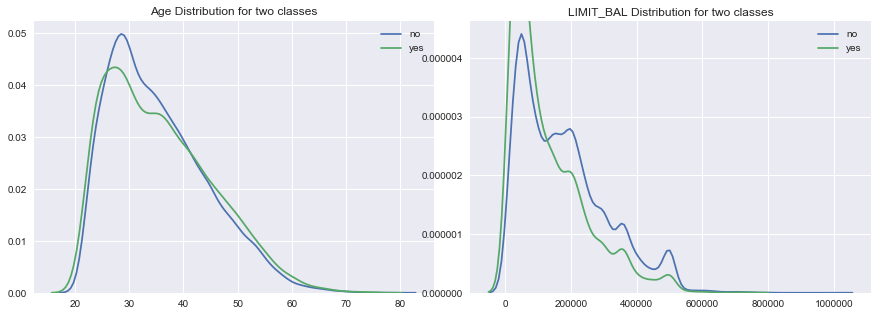

In [62]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
plt.figure(figsize=(15,5))# set up subplot grid
gridspec.GridSpec(1,4)
plt.subplot2grid((1,4), (0,0), colspan=2, rowspan=1)
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==0,"AGE"].values, label="no")
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==1,"AGE"].values, label="yes")
plt.legend();
plt.title("Age Distribution for two classes")
plt.subplot2grid((1,4), (0,2), colspan=2, rowspan=1)
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==0,"LIMIT_BAL"].values, label="no")
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==1,"LIMIT_BAL"].values, label="yes")
plt.legend();
plt.title("LIMIT_BAL Distribution for two classes")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0fdf4a20>,
      dtype=object)

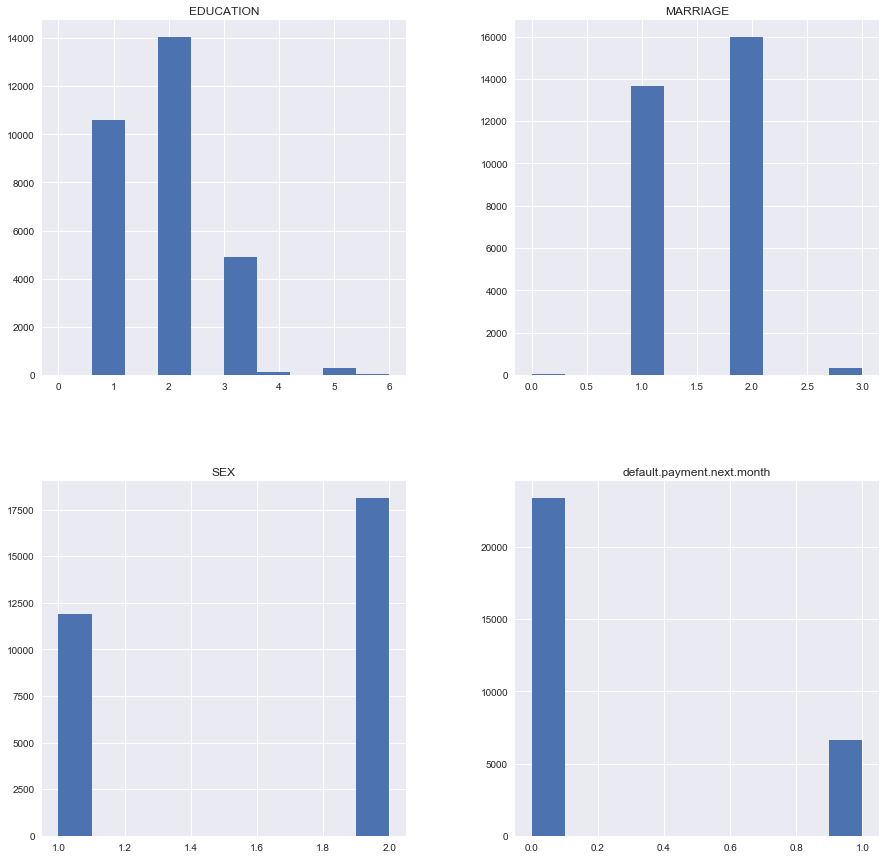

In [104]:
creditData[['SEX', 'EDUCATION', 'MARRIAGE','default.payment.next.month']].hist(figsize=(15,15))


#### Variable Types:
1. Continuous:<br>
'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
2. Categorical: <br>
'SEX', 'EDUCATION', 'MARRIAGE'
3. Target:<br>
'default.payment.next.month'

#### Preprocessing steps:
1. Normalizing Continuous variables
2. One Hot Encoding for Categorical

Text(0.5,1,'LIMIT_BAL Distribution for two classes')

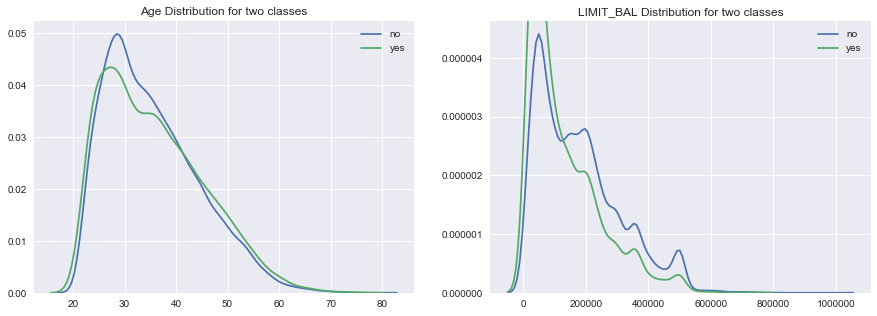

In [63]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax1.figsize=(10, 20)
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==0,"AGE"].values, label="no")
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==1,"AGE"].values, label="yes")
plt.legend();
plt.title("Age Distribution for two classes")
plt.subplot(1,2,2)
plt.figsize=(10, 20)
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==0,"LIMIT_BAL"].values, label="no")
sns.kdeplot(creditData.loc[creditData["default.payment.next.month"]==1,"LIMIT_BAL"].values, label="yes")
plt.legend();
plt.title("LIMIT_BAL Distribution for two classes")

In [295]:
creditData.loc[creditData["SEX"]==2] = 0
set(creditData["SEX"])


{0, 1}

In [150]:
df = pd.get_dummies(creditData["MARRIAGE"])
df.columns = ['MARRIAGE_unk','MARRIAGE_married', 'MARRIAGE_single','MARRIAGE_others']
creditData = pd.concat([creditData,df],axis=1)

In [135]:
# df = pd.get_dummies(creditData["SEX"])
# df.columns = ['MALE','FEMALE']
# creditData = pd.concat([creditData,df],axis=1)

In [151]:
creditData["EDUCATION_grad"] = 0
creditData["EDUCATION_university"] = 0
creditData["EDUCATION_hs"] = 0
creditData["EDUCATION_others"] = 0
creditData["EDUCATION_ukn"] = 0
creditData.loc[creditData["EDUCATION"]==1,"EDUCATION_grad"] = 1
creditData.loc[creditData["EDUCATION"]==2,"EDUCATION_university"] = 1
creditData.loc[creditData["EDUCATION"]==3,"EDUCATION_hs"] = 1
creditData.loc[creditData["EDUCATION"]==4,"EDUCATION_others"] = 1
creditData.loc[creditData["EDUCATION"]==5,"EDUCATION_ukn"] = 1
creditData.loc[creditData["EDUCATION"]==0,"EDUCATION_ukn"] = 1
creditData.loc[creditData["EDUCATION"]==6,"EDUCATION_ukn"] = 1


In [139]:
ageGrps = list(range(20,85,5))

In [140]:
set( pd.cut(creditData.AGE,ageGrps))

{Interval(20, 25, closed='right'),
 Interval(25, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right'),
 Interval(40, 45, closed='right'),
 Interval(45, 50, closed='right'),
 Interval(50, 55, closed='right'),
 Interval(55, 60, closed='right'),
 Interval(60, 65, closed='right'),
 Interval(65, 70, closed='right'),
 Interval(70, 75, closed='right'),
 Interval(75, 80, closed='right')}

In [152]:
ageCrediters = pd.cut(creditData.AGE,ageGrps).to_frame()
ageCrediters.columns = ["AGE_RANGE"]
creditData = pd.concat([creditData,ageCrediters],axis=1)
creditData.AGE_RANGE = creditData.AGE_RANGE.astype('str')

In [153]:
pd.get_dummies(creditData.AGE_RANGE).columns#[0]

Index(['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]',
       '(50, 55]', '(55, 60]', '(60, 65]', '(65, 70]', '(70, 75]', '(75, 80]'],
      dtype='object')

In [155]:
df = pd.get_dummies(creditData.AGE_RANGE)
df.columns = ['AGE_(20, 25]', 'AGE_(25, 30]', 'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 45]', 'AGE_(45, 50]',
       'AGE_(50, 55]', 'AGE_(55, 60]', 'AGE_(60, 65]', 'AGE_(65, 70]', 'AGE_(70, 75]', 'AGE_(75, 80]']
creditData = pd.concat([creditData,df],axis=1)

In [156]:
creditData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'MARRIAGE_unk', 'MARRIAGE_married',
       'MARRIAGE_single', 'MARRIAGE_others', 'EDUCATION_grad',
       'EDUCATION_university', 'EDUCATION_hs', 'EDUCATION_others',
       'EDUCATION_ukn', 'AGE_RANGE', 'AGE_(20, 25]', 'AGE_(25, 30]',
       'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 45]', 'AGE_(45, 50]',
       'AGE_(50, 55]', 'AGE_(55, 60]', 'AGE_(60, 65]', 'AGE_(65, 70]',
       'AGE_(70, 75]', 'AGE_(75, 80]'],
      dtype='object')

In [162]:
df = creditData[["LIMIT_BAL","AGE_RANGE"]]
groupedANOVA = df.groupby(["AGE_RANGE"])
groupedANOVA

In [165]:
f,p = stats.f_oneway(groupedANOVA.get_group("(30, 35]")["LIMIT_BAL"],groupedANOVA.get_group("(35, 40]")["LIMIT_BAL"])
f,p

(0.1244265627075499, 0.7242891883391167)

In [168]:
from sklearn.preprocessing import StandardScaler
continuousCols = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
creditData.loc[:, continuousCols] = StandardScaler().fit_transform(creditData.loc[:, continuousCols].values)

In [101]:
curCols = ['LIMIT_BAL','SEX','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month', 'MARRIAGE_unk', 'MARRIAGE_married', 'MARRIAGE_single', 'MARRIAGE_others', 'EDUCATION_grad', 'EDUCATION_university', 'EDUCATION_hs', 'EDUCATION_others', 'EDUCATION_ukn']



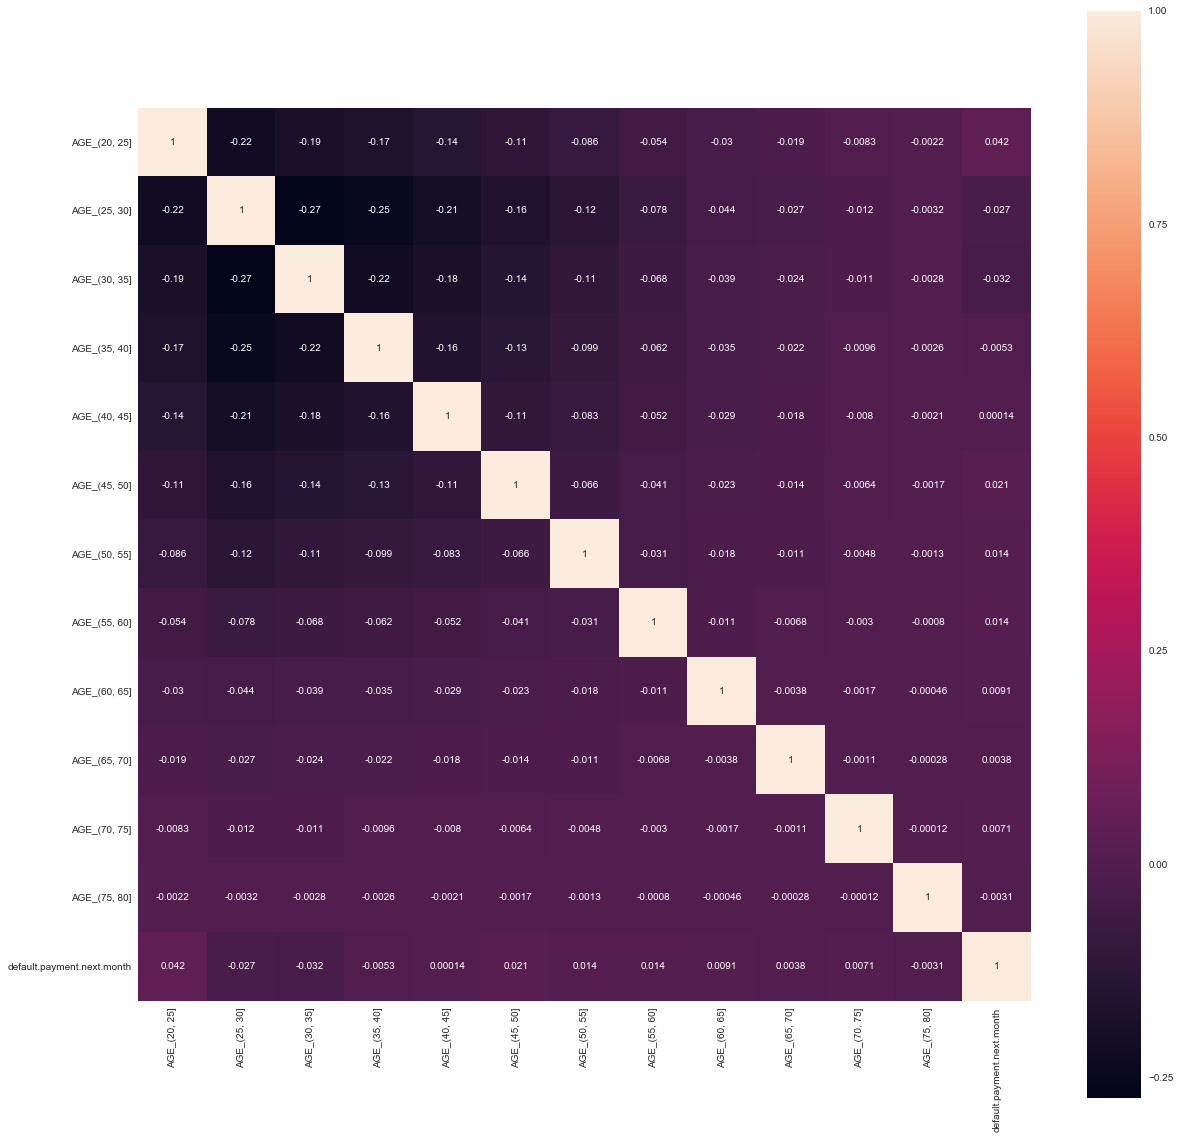

In [167]:
plt.figure(figsize=(20,20))
heat = sns.heatmap(creditData[['AGE_(20, 25]', 'AGE_(25, 30]',
       'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 45]', 'AGE_(45, 50]',
       'AGE_(50, 55]', 'AGE_(55, 60]', 'AGE_(60, 65]', 'AGE_(65, 70]',
       'AGE_(70, 75]', 'AGE_(75, 80]','default.payment.next.month']].corr(), vmax=1, square=True, annot=True)

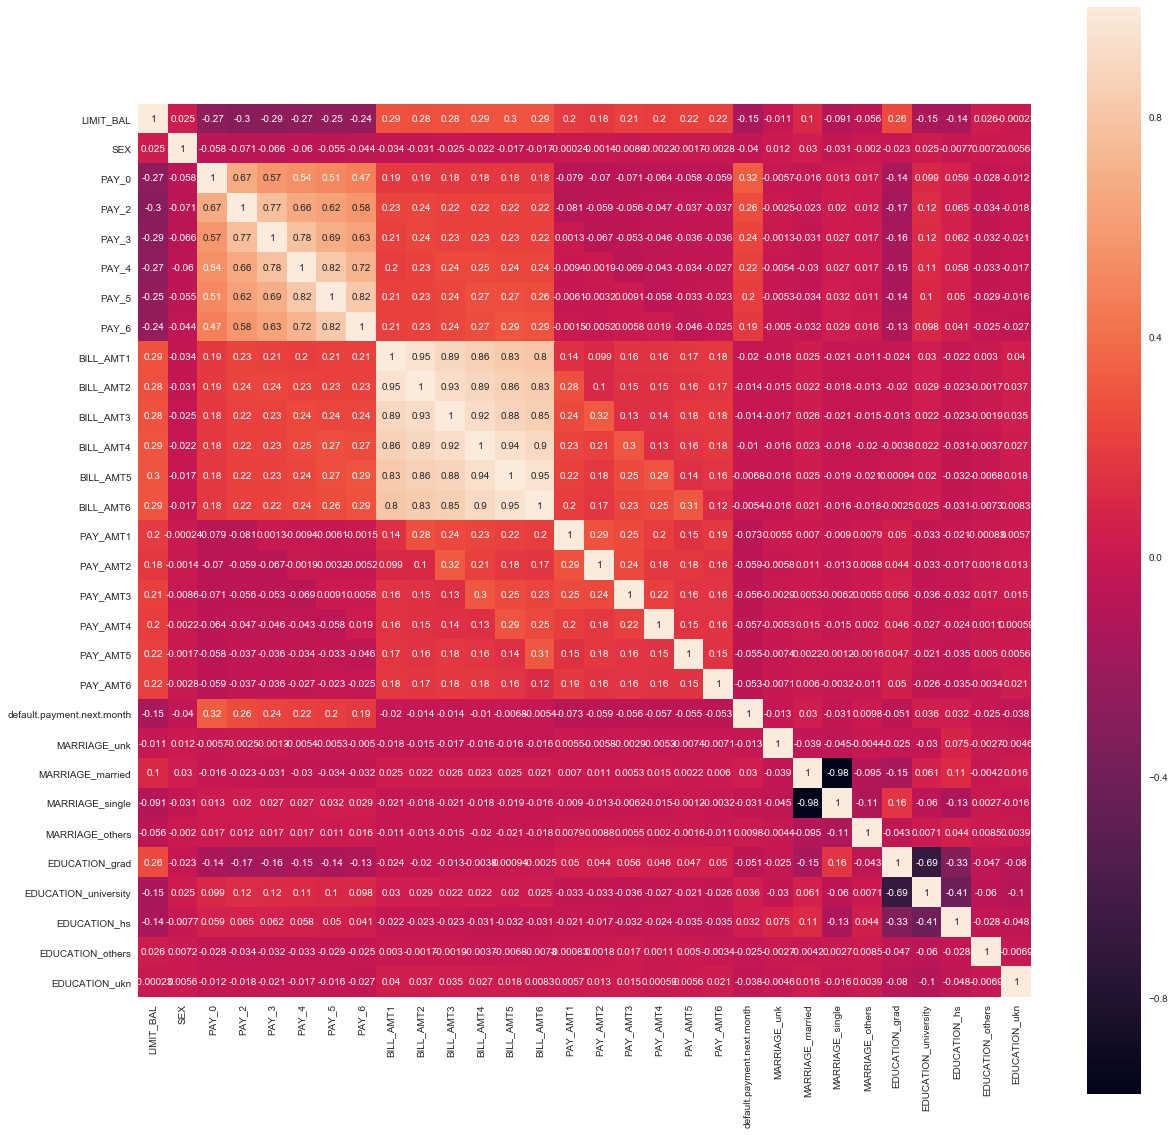

In [179]:
plt.figure(figsize=(20,20))
heat = sns.heatmap(creditData[curCols].corr(), vmax=1, square=True, annot=True)


In [175]:
creditData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'MARRIAGE_unk', 'MARRIAGE_married',
       'MARRIAGE_single', 'MARRIAGE_others', 'EDUCATION_grad',
       'EDUCATION_university', 'EDUCATION_hs', 'EDUCATION_others',
       'EDUCATION_ukn', 'AGE_RANGE', 'AGE_(20, 25]', 'AGE_(25, 30]',
       'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 45]', 'AGE_(45, 50]',
       'AGE_(50, 55]', 'AGE_(55, 60]', 'AGE_(60, 65]', 'AGE_(65, 70]',
       'AGE_(70, 75]', 'AGE_(75, 80]'],
      dtype='object')

In [565]:
features = ['LIMIT_BAL', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'MARRIAGE_unk', 'MARRIAGE_married',
        'EDUCATION_grad',
       'EDUCATION_university', 'EDUCATION_others',
       'EDUCATION_ukn', 'AGE_(20, 25]', 'AGE_(25, 30]',
       'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 45]', 'AGE_(45, 50]',
       'AGE_(50, 55]', 'AGE_(55, 60]', 'AGE_(60, 65]', 'AGE_(65, 70]',
       'AGE_(70, 75]']

In [557]:
len(features)

33

# III. Methods

- Summarize the nonlinear classification model. 
- Inherit the NeuralNet class for regression, implement your own version of Nonlinear Logistic Regression classifier. 
- Explain your codes. 
- Use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

#### Non Linear Classification Model:
- <b>Classification Model:</b><br>
Unlike regression, where we compute how close the prediction value is to the actual value by computing rmse or mse value, in classification model we check how many of the labels were correctly detected and for the ones that were wrongly detected model modifies the weights to accomodate those to classify them correctly.
- <b>Linear Classification Model:</b><br>
We can picture this as a model trying to split of classify data by creating a split boundary that is linear in nature i.e. Each variable has degree of 1.
- <b>Non-Linear Classification Model:</b><br>
We can picture this as a model trying to split of classify data by creating a split boundary that is non-linear in nature i.e. Each variable can have degree more than or equal to 1.
- <b>Non-Linear Classification Model in Neural Networks:</b><br>
Here, while we try to predict values in forward pass, we use a non-linear function as activation function. For example, hyperbolic tan (tanh).

In [748]:
from nn import NeuralNet
from util import Standardizer
class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """
    
    # Initializing just the super class (NeuralNet)
    def __init__(self, nunits):
        super(NeuralNetLogReg, self).__init__(nunits) # initializing super class of Neural Net
        pass

    # Softmax Function
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # Forward pass for non linear logistic classification model
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = self.softmax(np.dot(NeuralNet.add_ones(self,t), self._W[i])) # applying softmax at last layer
            else:
                t = np.tanh(np.dot(NeuralNet.add_ones(self,t), self._W[i]))
        return t, Z

    
    
    # This is the error function that we want to minimize
    def _objectf(self, T, Y, wpenalty):
        return -1 * np.sum(np.sum(np.multiply(T, np.log(Y)), axis = 0)) - wpenalty # Implementing non-linear objective function
        

    # Reusing the NeuralNet train function by making changes in the way data is passed
    def train(self, X, T, **params):
        T = T.flatten()   # flattening it to get it to 1-D array if it is not
        di = pd.get_dummies(T) # Creating ONE HOT ENCODING of the output classes 
        indicatorMatrix = di.values
        NeuralNet.train(self, X, indicatorMatrix, **params)

    
    # Uing argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)  # Computes probabilities
        Classes = np.argmax(Y, 1) # Computes the labels
        return Classes, Y


#### Code Explanation:
- In forward pass, we add softmax layer in output layer only, rest is same as in its super class NeuralNet.
- We change the objective funtion to the non linear objective function that we need to minimize.
- Classification can have multiple labels but the formula is very similar to regression and so we can reuse the code in our Super class by making minor edits. First we change the labels in one hot encoding format since only difference between classification and regression formula is that matrix and number of outputs become same as number of classes.
- In use function, we use argmax function to find the class to data point belongs to and return that instead of the probability values

#### Testing NeuralNet Model Created on Genric Data

Text(0.5,1,'test data set')

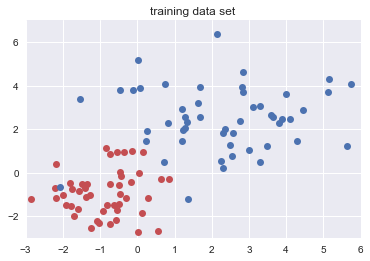

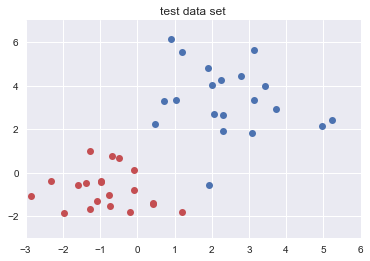

In [277]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'ob')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'ob')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [749]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/Users/snandu1/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/snandu1/Documents/ML/Assignment 4/grad.py:128: RuntimeWarning: invalid value encountered in double_scalars
  Delta = 2. * (fnew - fold) / (alpha*mu)


In [745]:
classes

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [750]:
out = Ttest.flatten()

In [751]:
from sklearn import metrics
CM = metrics.confusion_matrix(classes, out)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy =", ((TP+TN)*100/out.shape[0]),"%")
print("Precision =", ((TP)*100/(TP+FP)),"%")
print("Recall =", ((TP)*100/(TP+FN)),"%")

Accuracy = 100.0 %
Precision = 100.0 %
Recall = 100.0 %


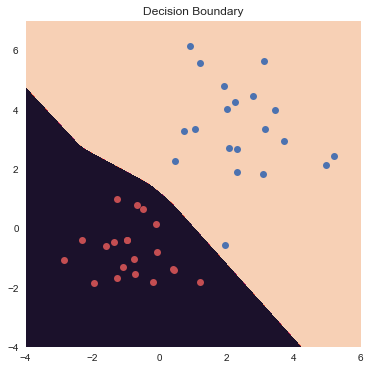

In [752]:
x = np.linspace(-4, 6, 1000)
y = np.linspace(-4, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'ob')

# IV - Results

- Pick one of classifieres in Assignment #2 and compare with Nonlinear Logistic Regression.
- Presents the results of applications of thw two classifiers.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

In [797]:
def getAllPreformanceMeasures(output, target):
    target = target.flatten() # if target vector is not one dimentional in axis = 1
    CM = metrics.confusion_matrix(output, target) #creating confusion matrix
    TN = CM[0][0] # True Negatives
    FN = CM[1][0] # False Negatives
    TP = CM[1][1] # True Positives
    FP = CM[0][1] # False Positives
    return (TP+TN)*100/output.shape[0],(TP)*100/(TP+FP),(TP)*100/(TP+FN) # Returns (accuracy, precesion and recall)
    


### Using QDA Model from assignment 2
##### QDA:
This is a probabilistic model. It uses bayes rule underneath. It computes a delta fuction based on given a target what is the probabilty of input belonging to a class. Now the catch is that we don't need to compute everything since there is lot of common terms.
Also, underlying assumption is that data follows a gaussian distribution.
Finally, prediction is made using given an input what is the delta fuction for that input for each class and class with highest value is categorized as target class


In [397]:
import numpy as np
import abc
from abc import ABC, abstractmethod
from copy import deepcopy as copy 

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
        
    def getParams(self):
        return (self.meanX,self.stdX)
    

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

In [581]:
#Classification using Quadratic Discriminant Analysis
class QDA(Classifier): 
    """ 
        QDA class 
        
        attributes
        ===========
        muAll       ndarray      [Number of classes x Number of features]
                    Means of all the features for each class
        sigmaAll    ndarray      [Number of classes x Number of features x Number of features]
                    Covariance matrices for each class
        priorsAll   ndarray      [Number of classes]
                    probability of each class
        dAll        ndarray   [Number of classes x Number of points in test case]
                    delta function values for each point for each class
        classes     ndarray      [Number of classes]
                    List of all unique class labels
    """
    def __init__(self):
        Classifier.__init__(self)
        self.muAll = None
        self.sigmaAll = None
        self.priorsAll = None
        self.dAll = None
        self.classes = None
        
    
    def QDA(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)
        
    # train QDA (computing mu, sigma and priors for each feature)
    def train(self, X, T):
        XNormalized = Classifier.normalize(self,X)
#         print(XNormalized)
        self.classes = list(set(T))
        numClasses = len(self.classes)
        self.muAll = np.zeros([numClasses,XNormalized.shape[1]],np.float64)
        self.sigmaAll = np.zeros([numClasses,XNormalized.shape[1],XNormalized.shape[1]],np.float64)
        self.priorsAll = np.zeros(numClasses,np.float64)
        for i in range(numClasses):
            labelIndices = np.where(T==self.classes[i])[0]
            self.muAll[i] = np.mean(XNormalized[labelIndices],0)
            self.sigmaAll[i] = np.cov(XNormalized[labelIndices].T)
            self.priorsAll[i] = len(labelIndices)/N

    
    # apply the learned model to data X
    def use(self, X):
        mean,std = Classifier.getParams(self)
        #print(mean)
        XNormalized = (X-mean)/std
        numClasses = len(self.classes)
        self.dAll = np.zeros([numClasses,XNormalized.shape[0]],np.float64)
        for i in range(numClasses):
            self.dAll[i] = self.QDA(XNormalized,self.muAll[i],self.sigmaAll[i],self.priorsAll[i])
        return [self.classes[i] for i in np.argmax(self.dAll,0)]

## Applying Models to Credit Data

In [753]:
# Only picking data and features that we need
data = creditData[features+['default.payment.next.month']]

#### Splitting data to 70-30 split into train and test data respectively

In [754]:
trainData = data.sample(frac=.70) # random sampling of 70 of data
testData = data.loc[set(data.index)- set(trainData.index)] # picking the rest 30% of the data

#### Chosen Features

In [786]:
print(features)

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARRIAGE_unk', 'MARRIAGE_married', 'EDUCATION_grad', 'EDUCATION_university', 'EDUCATION_others', 'EDUCATION_ukn', 'AGE_(20, 25]', 'AGE_(25, 30]', 'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 45]', 'AGE_(45, 50]', 'AGE_(50, 55]', 'AGE_(55, 60]', 'AGE_(60, 65]', 'AGE_(65, 70]', 'AGE_(70, 75]']


### Applying Neural Network Model

#### Preping data for the model

In [776]:
C1 = trainData.loc[trainData["default.payment.next.month"]==0][features].values # Training data for class 1
C2 = trainData.loc[trainData["default.payment.next.month"]==1][features].values # Training data for class 2

XTrain = np.vstack((C1, C2))
N = XTrain.shape[0]  
w = np.zeros(XTrain.shape[1]) 

TTrain = np.ones(N) # Training Labels data for class 1
TTrain[:len(C1)] *= 0 # Training Labels data for class 2

CT1 = testData.loc[testData["default.payment.next.month"]==0][features].values # Testing data for class 1
CT2 = testData.loc[testData["default.payment.next.month"]==1][features].values # Testing data for class 2

XTest = np.vstack((CT1, CT2))
N1 = XTest.shape[0]
TTest = np.ones(N1) # Testing Labels data for class 1
TTest[:len(CT1)] *= 0 # Testing Labels data for class 2

In [777]:
XTrain.shape

(21000, 31)

In [326]:
clsf._nLayers

2

#### Simple Implementation

In [756]:
clsf = NeuralNetLogReg([XTrain.shape[1],2 , 2])
clsf.train(XTrain, TTrain)
classes, Y = clsf.use(XTest)

/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/Users/snandu1/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


In [757]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 75.87777777777778 %
Precision = 89.55732122587968 %
Recall = 27.510460251046027 %


#### Simple Implementation on different Sample data

In [590]:
clsf = NeuralNetLogReg([XTrain.shape[1],2 , 2])
clsf.train(XTrain, TTrain)
classes, Y = clsf.use(XTest)

In [593]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 78.3 %
Precision = 82.38702201622247 %
Recall = 28.304140127388536 %


#### Changing optimization parameter to steepest gradient

In [758]:
clsf = NeuralNetLogReg([XTrain.shape[1],2 , 2])
clsf.train(XTrain, TTrain,Lambda=0,optim="steepest")
classes, Y = clsf.use(XTest)

In [759]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 89.5 %
Precision = 46.99205448354143 %
Recall = 46.412556053811656 %


#### Changing optimization parameter to steepest gradient and lambda to 0.1

In [737]:
clsf = NeuralNetLogReg([XTrain.shape[1],2 , 2])
clsf.train(XTrain, TTrain,Lambda=0.1,optim="steepest")
classes, Y = clsf.use(XTest)

In [736]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 10.233333333333333 %
Precision = 100.0 %
Recall = 10.233333333333333 %


In [796]:
#### Changing optimization parameter to steepest gradient and lambda to 1

In [652]:
clsf = NeuralNetLogReg([XTrain.shape[1],2 , 2])
clsf.train(XTrain, TTrain,Lambda=1,optim="steepest")
classes, Y = clsf.use(XTest)

In [653]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 78.06666666666666 %
Precision = 87.48551564310544 %
Recall = 28.805799313239223 %


#### Changing number of hidden layer node to 4

In [760]:
clsf = NeuralNetLogReg([XTrain.shape[1],4 , 2])
clsf.train(XTrain, TTrain,Lambda=0,optim="steepest")
classes, Y = clsf.use(XTest)

In [761]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 78.93333333333334 %
Precision = 77.5255391600454 %
Recall = 28.68542629147417 %


#### Changing number of hidden layer node to 3

In [764]:
clsf = NeuralNetLogReg([XTrain.shape[1],3, 2])
clsf.train(XTrain, TTrain,Lambda=0.1,optim="steepest")
classes, Y = clsf.use(XTest)

In [765]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 86.82222222222222 %
Precision = 53.802497162315554 %
Recall = 37.829209896249004 %


#### 2 hidden layers and with nodes 4 and 2 respectivey

In [762]:
clsf = NeuralNetLogReg([XTrain.shape[1],4,2, 2])
clsf.train(XTrain, TTrain,Lambda=0.1,optim="steepest")
classes, Y = clsf.use(XTest)

In [763]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 10.044444444444444 %
Precision = 99.20544835414302 %
Recall = 9.751199375209193 %


#### 2 hidden layers and with nodes 2 and 2 respectivey

In [766]:
clsf = NeuralNetLogReg([XTrain.shape[1],2,2, 2])
clsf.train(XTrain, TTrain,Lambda=0,optim="steepest")
classes, Y = clsf.use(XTest)

In [767]:
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 17.433333333333334 %
Precision = 74.91486946651533 %
Recall = 8.386277001270647 %


#### 2 hidden layers (Nodes [2,2]) and increasing number of iterations to 2000

In [771]:
clsf = NeuralNetLogReg([XTrain.shape[1],2,2, 2])
clsf.train(XTrain, TTrain,Lambda=0,optim="steepest",niter=2000)
classes, Y = clsf.use(XTest)
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 87.58888888888889 %
Precision = 16.23155505107832 %
Recall = 27.39463601532567 %


In [772]:
pd.crosstab(pd.Series(out, name='Actual'),pd.Series(np.sign(classes), name='Predicted'))

Predicted,0,1
Actual,,
0.0,7740,379
1.0,738,143


#### 2 hidden layers (Nodes [2,2]) and increasing number of iterations to 3000

In [774]:
clsf = NeuralNetLogReg([XTrain.shape[1],2,2, 2])
clsf.train(XTrain, TTrain,Lambda=0,optim="steepest",niter=3000)
classes, Y = clsf.use(XTest)
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 82.16666666666667 %
Precision = 40.635641316685586 %
Recall = 24.86111111111111 %


In [775]:
pd.crosstab(pd.Series(out, name='Actual'),pd.Series(np.sign(classes), name='Predicted'))

Predicted,0,1
Actual,,
0.0,7037,1082
1.0,523,358


#### 2 hidden layers (Nodes [31,2]) and increasing number of iterations to 8000

In [778]:
clsf = NeuralNetLogReg([XTrain.shape[1],31,2, 2])
clsf.train(XTrain, TTrain,Lambda=0,optim="steepest",niter=8000)
classes, Y = clsf.use(XTest)
measures = getAllPreformanceMeasures(classes,TTest)
print("Accuracy =", measures[0],"%")
print("Precision =", measures[1],"%")
print("Recall =", measures[2],"%")

Accuracy = 87.31111111111112 %
Precision = 57.32122587968218 %
Recall = 39.73249409913454 %


In [779]:
pd.crosstab(pd.Series(out, name='Actual'),pd.Series(np.sign(classes), name='Predicted'))

Predicted,0,1
Actual,,
0.0,7353,766
1.0,376,505


### Applying QDA Model

#### Prepping Data for QDA

In [724]:
C1 = trainData.loc[trainData["default.payment.next.month"]==0][features].values
C2 = trainData.loc[trainData["default.payment.next.month"]==1][features].values

XTrain = np.vstack((C1, C2))
N = XTrain.shape[0]
w = np.zeros(XTrain.shape[1])

TTrain = np.ones(N)
TTrain[:len(C1)] *= -1

CT1 = testData.loc[testData["default.payment.next.month"]==0][features].values
CT2 = testData.loc[testData["default.payment.next.month"]==1][features].values

XTest = np.vstack((CT1, CT2))
N1 = XTest.shape[0]
TTest = np.ones(N1)
TTest[:len(CT1)] *= -1

In [725]:
model = QDA()
model.train(XTrain,TTrain)

In [726]:
out = np.array(model.use(XTest))

In [727]:
CM = metrics.confusion_matrix(TTest, out)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy =", ((TP+TN)*100/out.shape[0]),"%")
print("Precision =", ((TP)*100/(TP+FP)),"%")
print("Recall =", ((TP)*100/(TP+FN)),"%")

Accuracy = 69.86666666666666 %
Precision = 24.06732117812062 %
Recall = 99.42062572421784 %


## Cross-Validation

Model parameters are very important and their selection can be very critical. Cross Validation helps in identifying which one is the best by running through all possible combinations.
The idea is preparing one dataset (a validation set) by pretending that we cannot see the labels. After choosing a model parameter (or a model) and train it with training dataset, we test it on the validation data. 
Comparing the validation error, we select the one that has the lowest validation error. Finally, we evaluate the model on testing data. 

Here follows the K-fold cross-validation that divides the data into K blocks for traing, validating and testing.

### K-fold CV Procedure


>  Choose K for K-fold cross validation.

>  Set nfold = 0. 

>  Initialize the lists *res* = [], *testErrs* = [].

>  Split data X and label T into K number of partitions.

>  For each TEST partition 

>>  For each validation partition among the rest partitions 

>>>  Choose the rest partitions into a training set.

>>>  For each set __P__ of parameters to test

>>>>   Using __P__, train the model 

>>>>   Use the trained model on the validation data

>>>>   Evaluate the validation result and store the restuls to *res*

>>  From the *res* result, pick the one with the best result.

>>  Retrain the model with the best parameter __p__ in __P__.

>>  Apply the model with the best parameter __p*__ to the test dataset. 

>>  Evaluate the result *err* and store the tuple (__p*__, *err*) to *testErrs*. 

>  Return *testErrs*. 


#### Data Prepping

In [600]:
data = data.sample(frac=1) # Shuffling data

In [782]:
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,"AGE_(30, 35]","AGE_(35, 40]","AGE_(40, 45]","AGE_(45, 50]","AGE_(50, 55]","AGE_(55, 60]","AGE_(60, 65]","AGE_(65, 70]","AGE_(70, 75]",default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,-0.905498,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.221191,1.335034,...,0,0,0,0,0,1,0,0,0,0


In [781]:
X = data[features].values # Feature data
T = data["default.payment.next.month"].values # Target data

In [791]:
# Function to find all possible combinations of different parameters in Neural Network
# Input is parameters dictionary that need to be tested
# Output is all the combinations of those parameters
def getParamsCombination(params):
    allParams = []
    vals = list(params.values())
    keys = list(params.keys())
    for currParams in list(itertools.product(*vals)): # iterating through all the permutations of those parameter combinations
        # defining default values for each parameters 
        defaultAllParams = {"verbose":False,"Lambda":0,"niter":1000,"wprecision":1e-10,"fprecision":1e-10,"wtracep":False,"ftracep":False,"optim":'scg',"explore":False}
        for keyIndex in range(len(keys)):    
            defaultAllParams[keys[keyIndex]] = currParams[keyIndex] # changing values of parameters that need to be tested or changed
        allParams.append(defaultAllParams) #collecting all the permutations of parameters
    return allParams

# Function to implement K-Fold cross Validation
# Outputs all the results
def kFoldCrossValidation(X,T,params,k=5): # X: Data, T: Target Variable, params: Dictionary of all the parameters you want to try
    #k is number of partitions or k-fold
    Accuracy = [] 
    allParams = getParamsCombination(params) # give all possible permutations of the parameters passed.
    
    results = []
    testResults = []
    # Splitting Data into k partitions
    partitionsX = np.array_split(X,k)
    partitionsT = np.array_split(T,k)
    # Testing on each partition
    for testIndex in range(k):
        # Assigning test data as one of the k partitions
        testData = partitionsX[testIndex]
        testLabel = partitionsT[testIndex]
        print(testIndex)
        results.append([])
        # Validating on each partitions of the remaining partitions
        for validationIndex in range(k):
            if testIndex!=validationIndex: # Should not be test partition
                # Assigning validation data as one of remaining partitions
                validationData = partitionsX[validationIndex]
                validationLabel = partitionsT[validationIndex]
                print("\t",validationIndex)
                trainData = []
                # Merging all other partitions as training data
                for trainIndex in range(k):
                    if testIndex!=trainIndex and trainIndex!=validationIndex: # Selecting partitions that are not validating or testing partition
                        #print("\t\t",trainIndex)
                        if len(trainData)==0:
                            trainData = partitionsX[trainIndex]
                            trainLabel = partitionsT[trainIndex]
                        else:
                            trainData = np.concatenate([trainData,partitionsX[trainIndex]],axis=0)
                            trainLabel = np.concatenate([trainLabel,partitionsT[trainIndex]],axis=0)
                for param in allParams: # iterating over the available parameters
                    # Running model with certain parameters
                    clsf = NeuralNetLogReg([trainData.shape[1],2 , 2])
                    clsf.train(trainData, trainLabel,Lambda=param["Lambda"],optim=param["optim"],verbose=param["verbose"],niter=param["niter"],wprecision=param["wprecision"],fprecision=param["fprecision"],wtracep=param["wtracep"],ftracep=param["ftracep"],explore=param["explore"])
                    classes, Y = clsf.use(validationData)
                    measures = getAllPreformanceMeasures(classes, validationLabel) # Measuring performance
                    results[testIndex].append(np.array([measures[0],param])) # Adding performance and parameters to the list
                    #print((TP+TN)*100/out.shape[0])
        #get best result from validation set based on Accuracy and then testing those on test set
        results[testIndex] = np.array(results[testIndex]) # converting list to np.array so as to use argmax later on
        print("Best Result for Validation with test Group ",testIndex,": ",results[testIndex][results[testIndex][:,0].argmax()][0])
        bestParams = results[testIndex][results[testIndex][:,0].argmax()][1]
        
        # Re-training Model based on best parameters
        clsf = NeuralNetLogReg([trainData.shape[1],2 , 2])
        clsf.train(trainData, trainLabel,Lambda=bestParams["Lambda"],optim=bestParams["optim"],verbose=bestParams["verbose"],niter=bestParams["niter"],wprecision=bestParams["wprecision"],fprecision=bestParams["fprecision"],wtracep=bestParams["wtracep"],ftracep=bestParams["ftracep"],explore=bestParams["explore"])
        classes, Y = clsf.use(testData) # Applying model to predict classes of test data
        testMeasures = getAllPreformanceMeasures(classes, testLabel) # Measuring performance
        testResults.append(testMeasures)
        print("Measure on Test Data: \n\tAccuarcy: ",testMeasures[0],"\tPrecision: ",testMeasures[1],"\tRecall",testMeasures[2])
    return testResults, results    

In [688]:
temp1 = np.array([np.array([30,temp[0]]),np.array([50,temp[1]]),np.array([90,temp[0]])])
#temp1[].argmax

In [702]:
temp1[temp1[:,0].argmax()][1]

{'Lambda': 0,
 'explore': False,
 'fprecision': 1e-10,
 'ftracep': False,
 'niter': 1000,
 'optim': 'scg',
 'verbose': False,
 'wprecision': 1e-10,
 'wtracep': False}

In [710]:
params.keys()

dict_keys(['optim'])

In [711]:
params = {"optim":["scg","steepest"]}#,"Lambda":[0.01, 0.1, 0, 1, 10]}
s=params.values()
list(itertools.product(*s))

# s=[ [ 'a', 'b', 'c'], ['d'], ['e', 'f'] ]


[('scg',), ('steepest',)]

In [684]:
temp = getParamsCombination(params)

In [792]:
mainResults, intermediateResults = kFoldCrossValidation(X,T,params,k=5)

0
	 1


/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


	 2
	 3
	 4
Best Result for Validation with test Group  0 :  90.58333333333333
Measure on Test Data: 
	Accuarcy:  86.58333333333333 	Precision:  49.029982363315696 	Recall 35.012594458438286
1
	 0
	 2


/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/Users/snandu1/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


	 3
	 4
Best Result for Validation with test Group  1 :  91.86666666666666
Measure on Test Data: 
	Accuarcy:  84.35 	Precision:  53.40557275541796 	Recall 35.09664292980671
2
	 0
	 1
	 3
	 4
Best Result for Validation with test Group  2 :  93.8
Measure on Test Data: 
	Accuarcy:  80.11666666666666 	Precision:  82.34323432343234 	Recall 31.482649842271293
3
	 0
	 1
	 2
	 4
Best Result for Validation with test Group  3 :  91.31666666666666
Measure on Test Data: 
	Accuarcy:  85.13333333333334 	Precision:  91.30434782608695 	Recall 28.093645484949832
4
	 0
	 1
	 2
	 3
Best Result for Validation with test Group  4 :  94.95
Measure on Test Data: 
	Accuarcy:  71.5 	Precision:  88.48396501457727 	Recall 27.12243074173369


(0, 100)

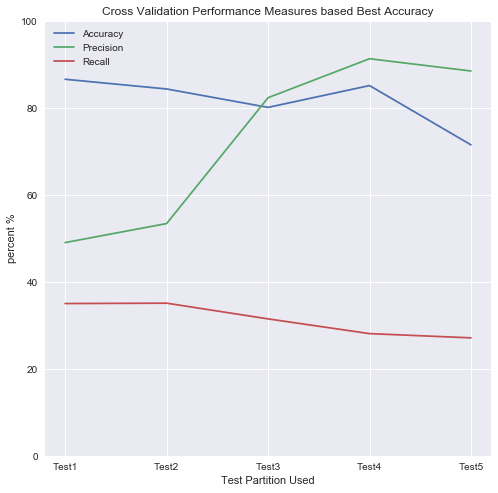

In [823]:
plt.figure(figsize=(8,8))
results = np.array(mainResults)
plt.plot(results[:,0],label="Accuracy")
plt.plot(results[:,1],label="Precision")
plt.plot(results[:,2],label="Recall")
plt.legend(loc='upper left')
plt.xticks([0,1,2,3,4], ["Test1","Test2","Test3","Test4","Test5"])
plt.title("Cross Validation Performance Measures based Best Accuracy")
plt.ylabel("percent %")
plt.xlabel("Test Partition Used")
plt.ylim([0,100])

### Cross Validation where best performance is based on f-measure

In [794]:
def kFoldCrossValidationBasedOnF_Score(X,T,params,k=5): # X: Data, T: Target Variable, params: Dictionary of all the parameters you want to try
    #k is number of partitions or k-fold
    Accuracy = [] 
    allParams = getParamsCombination(params) # give all possible permutations of the parameters passed.
    
    results = []
    testResults = []
    # Splitting Data into k partitions
    partitionsX = np.array_split(X,k)
    partitionsT = np.array_split(T,k)
    # Testing on each partition
    for testIndex in range(k):
        # Assigning test data as one of the k partitions
        testData = partitionsX[testIndex]
        testLabel = partitionsT[testIndex]
        print(testIndex)
        results.append([])
        # Validating on each partitions of the remaining partitions
        for validationIndex in range(k):
            if testIndex!=validationIndex: # Should not be test partition
                # Assigning validation data as one of remaining partitions
                validationData = partitionsX[validationIndex]
                validationLabel = partitionsT[validationIndex]
                print("\t",validationIndex)
                trainData = []
                # Merging all other partitions as training data
                for trainIndex in range(k):
                    if testIndex!=trainIndex and trainIndex!=validationIndex: # Selecting partitions that are not validating or testing partition
                        #print("\t\t",trainIndex)
                        if len(trainData)==0:
                            trainData = partitionsX[trainIndex]
                            trainLabel = partitionsT[trainIndex]
                        else:
                            trainData = np.concatenate([trainData,partitionsX[trainIndex]],axis=0)
                            trainLabel = np.concatenate([trainLabel,partitionsT[trainIndex]],axis=0)
                for param in allParams: # iterating over the available parameters
                    # Running model with certain parameters
                    clsf = NeuralNetLogReg([trainData.shape[1],2 , 2])
                    clsf.train(trainData, trainLabel,Lambda=param["Lambda"],optim=param["optim"],verbose=param["verbose"],niter=param["niter"],wprecision=param["wprecision"],fprecision=param["fprecision"],wtracep=param["wtracep"],ftracep=param["ftracep"],explore=param["explore"])
                    classes, Y = clsf.use(validationData)
                    measures = getAllPreformanceMeasures(classes, validationLabel)
                    fscore = 2*measures[1]*measures[2]/(measures[1]+measures[2])
                    results[testIndex].append(np.array([fscore,param]))
                    #print((TP+TN)*100/out.shape[0])
        #get best result from validation set based on F-measure and test on test set
        results[testIndex] = np.array(results[testIndex]) # converting list to np.array so as to use argmax later on
        print("Best Result for Validation with test Group ",testIndex,": ",results[testIndex][results[testIndex][:,0].argmax()][0])
        bestParams = results[testIndex][results[testIndex][:,0].argmax()][1]
        clsf = NeuralNetLogReg([trainData.shape[1],2 , 2])
        clsf.train(trainData, trainLabel,Lambda=bestParams["Lambda"],optim=bestParams["optim"],verbose=bestParams["verbose"],niter=bestParams["niter"],wprecision=bestParams["wprecision"],fprecision=bestParams["fprecision"],wtracep=bestParams["wtracep"],ftracep=bestParams["ftracep"],explore=bestParams["explore"])
        classes, Y = clsf.use(testData)
        testMeasures = getAllPreformanceMeasures(classes, testLabel)
        testResults.append(testMeasures)
        print("Measure on Test Data: \n\tAccuarcy: ",testMeasures[0],"\tPrecision: ",testMeasures[1],"\tRecall",testMeasures[2])
    return testResults, results

In [795]:
mainResults1, intermediateResults1 = kFoldCrossValidationBasedOnF_Score(X,T,params,k=5)

0
	 1


/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


	 2
	 3
	 4
Best Result for Validation with test Group  0 :  54.341164453524
Measure on Test Data: 
	Accuarcy:  73.63333333333334 	Precision:  88.18342151675485 	Recall 24.81389578163772
1
	 0
	 2
	 3
	 4


/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


Best Result for Validation with test Group  1 :  45.16605166051661
Measure on Test Data: 
	Accuarcy:  89.21666666666667 	Precision:  0.0 	Recall 0.0
2
	 0
	 1
	 3
	 4
Best Result for Validation with test Group  2 :  56.46067415730337
Measure on Test Data: 
	Accuarcy:  75.68333333333334 	Precision:  89.93399339933994 	Recall 28.04940813175502
3
	 0
	 1
	 2
	 4
Best Result for Validation with test Group  3 :  44.86166007905138
Measure on Test Data: 
	Accuarcy:  93.91666666666667 	Precision:  37.22826086956522 	Recall 50.55350553505535
4
	 0
	 1
	 2
	 3
Best Result for Validation with test Group  4 :  49.11764705882353
Measure on Test Data: 
	Accuarcy:  75.3 	Precision:  80.61224489795919 	Recall 29.07465825446898


In [804]:
results

array([[73.63333333, 88.18342152, 24.81389578],
       [89.21666667,  0.        ,  0.        ],
       [75.68333333, 89.9339934 , 28.04940813],
       [93.91666667, 37.22826087, 50.55350554],
       [75.3       , 80.6122449 , 29.07465825]])

(0, 100)

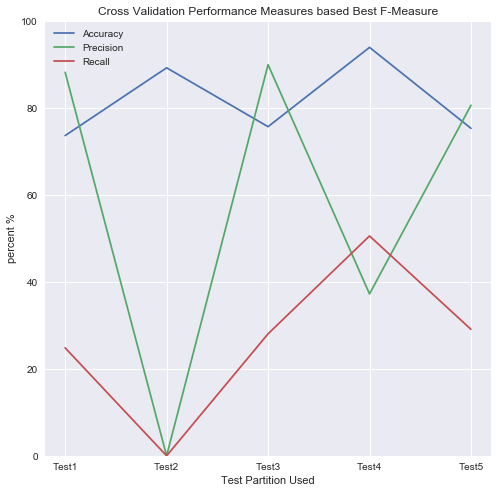

In [824]:
plt.figure(figsize=(8,8))
results = np.array(mainResults1)
plt.plot(results[:,0],label="Accuracy")
plt.plot(results[:,1],label="Precision")
plt.plot(results[:,2],label="Recall")
plt.legend(loc='upper left')
plt.xticks([0,1,2,3,4], ["Test1","Test2","Test3","Test4","Test5"])
plt.title("Cross Validation Performance Measures based Best F-Measure")
plt.ylabel("percent %")
plt.xlabel("Test Partition Used")
plt.ylim([0,100])
#plt.ylim(["test1","test2","test3","test4","test5"])

## Discussions on Results and model applied

#### Classifier Result Comparisions:

I ran QDA through the same dataset and it performed very poorly in comparison to Neural Net. But one the most important thing about the two models is that QDA could be used to complement Neural Net. What I mean is, while running QDA, I was forced to eliminate some columns else results will be incorrect. So, I changed feature vectors so that QDA works. But when I re ran it in Neural Nets then its performance improved. It helped in eleiminating noise

#### Parameters:
- There are 11 parameters that can be toggled or changed. Using these correctly, a neural net will result in much better accuracy or classification.
- Speepest Gradient Descent was giving much better results that scg.
- Classifier performed poorly for Lambda values more than and less than 0.
- Increasing number of nodes in hidden layer gave different results
- Increasing number of hidden layers lowers the accuracy
    - Reason can be diminishing gradient but increasing number of iterations helps

#### Linear Vs Non Linear Objective Function in Neural Net:
- Both have their own pros and cons
- In this data non linear objective function performed slightly better than linear and same happened in case of dummy dataset
- But problem with non linear objective function can be that it might overfit

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

- Challenges:
    - Reusing NeuralNet class that was meant for regression to classify by leveraging Object Oriented Programming
    - Implementing a generic Cross Validation function for any parameter for just Neural Net
        - This should be generalized to any model
    - Playing with model parameters and interpreting them
    - Struggling in terms of visual explanation of why model works and is so great

- Learning:
    - I have clear understanding of most Neural Network terms and math
    - Implemented a DNN from scratch
    - Strong understanding of hyper parameters and how to test and modufy them
    - Strong understanding of cross validation and why it is used
    - Model evaluation and performance is better understood
    

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Try nonlinear regression with neural networks and compare with linear regression model 
- Use cross validation to discover the best model and compare models. 

In [828]:
airData = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv",index_col=0)

In [836]:
airData[['DEWP','TEMP','PRES','Iws','pm2.5']].corr()

,DEWP,TEMP,PRES,Iws,pm2.5
DEWP,1.000000,0.824633,-0.778346,-0.296399,0.171423
TEMP,0.824633,1.000000,-0.826690,-0.154623,-0.090534
PRES,-0.778346,-0.826690,1.000000,0.185355,-0.047282
Iws,-0.296399,-0.154623,0.185355,1.000000,-0.247784
pm2.5,0.171423,-0.090534,-0.047282,-0.247784,1.000000


In [851]:
newAirData = airData.loc[~airData['pm2.5'].isnull()]
features = ['DEWP','Iws','TEMP','PRES']
data = newAirData[features+["pm2.5"]]

In [852]:
data.loc[:,features+["pm2.5"]] = StandardScaler().fit_transform(data.values)

/Users/snandu1/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [854]:
data.head()

,DEWP,Iws,TEMP,PRES,pm2.5
No,,,,,
25,-1.229791,-0.444944,-1.347143,0.345329,0.330114
26,-1.160508,-0.427007,-1.347143,0.345329,0.536525
27,-0.883375,-0.409069,-1.429278,0.442411,0.656027
28,-0.606241,-0.372993,-1.429278,0.539493,0.895029
29,-0.606241,-0.355055,-1.429278,0.539493,0.427888


In [855]:
trainData = data.sample(frac=.70) # random sampling of 70 of data
testData = data.loc[set(data.index)- set(trainData.index)] # picking the 

In [856]:
X = trainData[features].values
T = trainData['pm2.5'].values
X1 = testData[features].values
T1 = testData['pm2.5'].values

In [839]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [840]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        biasX = LinearModel.add_ones(self,X)  #Adding bias
        self.w = np.linalg.inv(biasX.T.dot(biasX)).dot(biasX.T).dot(T)  #Applying Least Square Model
    
    # apply the learned model to data X
    def use(self, X):
        biasX = LinearModel.add_ones(self,X)
        return biasX.dot(self.w)


In [857]:
# Train Model
ls = LinearRegress()
ls.train(X, T)

# Test Model
out = ls.use(X1)


In [858]:
from sklearn import metrics
print('MAE: \t', metrics.mean_absolute_error(out, T1))
print('MSE: \t', metrics.mean_squared_error(out, T1))
print('RMSE: \t', np.sqrt(metrics.mean_squared_error(out, T1)))

MAE: 	 0.640464459287853
MSE: 	 0.7792437001916209
RMSE: 	 0.8827478123403201


In [860]:
from nn import NeuralNet
from util import Standardizer
class NeuralNetNonLinear(NeuralNet):
    """ Nonlinear Logistic Regression
    """
    
    # Initializing just the super class (NeuralNet)
    def __init__(self, nunits):
        super(NeuralNetNonLinear, self).__init__(nunits) # initializing super class of Neural Net
        pass
  
    
    # This is the error function that we want to minimize
    def _objectf(self, T, Y, wpenalty):
        return -1 * np.sum(np.sum(np.multiply(T, np.log(Y)), axis = 0)) - wpenalty # Implementing non-linear objective function
        

In [868]:
T = T.reshape([-1,1])

In [875]:
nn = NeuralNetNonLinear([X.shape[1],2,1])
nn.train(X, T) 
Y = nn.use(X1)

/Users/snandu1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [876]:
from sklearn import metrics
print('MAE: \t', metrics.mean_absolute_error(Y, T1))
print('MSE: \t', metrics.mean_squared_error(Y, T1))
print('RMSE: \t', np.sqrt(metrics.mean_squared_error(Y, T1)))

MAE: 	 0.7387027954980656
MSE: 	 0.9944711065947116
RMSE: 	 0.9972317216147467


# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 | 5| Summary of Neural Networks
 | 5| Summary of Nonlinear Logistic Regression
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 20| plots for results (10 pts for each classifier)
| 5| Discussions about parameter/network structure choice 
| 5| Discussions about classificaion model comparison
| 5| Discussion about the classification results. Try to analyze what nonlinear logistic regression learned. 
5 | Conclusions 
